# 모듈 불러오기

In [2]:
import cv2
# 필요한 모듈 불러오기
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import torch

# 필요한 모듈 가져오기
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab
plt.rcParams['figure.figsize'] = 10, 10
import plotly.offline as py
import plotly.graph_objs as go
%matplotlib inline

# 데이터 처리

In [3]:
"""
추가 사항 :
1. 겉에 테두리 씌우기
2. 64*64 reshape (목표 크기로)
"""

# 데이터 로드
src_path = './data/normal_data/real_data_normal/20200518_take1.jpg'
img = cv2.imread(src_path, cv2.IMREAD_GRAYSCALE)
img_color = cv2.imread(src_path, cv2.IMREAD_COLOR)
img_color_ROI = img_color[709:1413,713:1417]
img_ROI = img[709:1413,713:1417]


# 데이터 이진화
_, src_bin = cv2.threshold(img_ROI, 180, 255, cv2.THRESH_BINARY)
src_bin = cv2.bitwise_not(src_bin)
# plt.imshow(img_ROI)
# cv2.imshow("img_ROI", img_ROI)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [4]:
img_list = list()

nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(src_bin)
dst = cv2.cvtColor(img_ROI, cv2.COLOR_GRAY2BGR)
alpha = 3
SIZE = 64
for i in range(1,nlabels):
    stat = stats[i]
    x = stat[0] - alpha
    y = stat[1] - alpha
    width = stat[2] + 2*alpha
    height = stat[3] + 2*alpha
    n_pixel = stat[4]

    
    
    # 최대 픽셀 지정해서 임계값보다 크면 패스해버리기
    
    if n_pixel < 500 or width > 64 or height > 64 : continue
    

    
    cv2.rectangle(dst, (x, y), (x+width, y+height), (0,100,255))
    # print(stat) # 가장자리쪽에 있는 생두들은 ROI를 벗어나는것들이 있다.

    
    delta_x = int((SIZE - width) / 2)
    delta_y = int((SIZE - height) / 2)
    
    tmp1 = img_color_ROI[y : y+height, x : x+width, :].copy()
    # print(tmp1)
    # plt.imshow(tmp1)
    tmp2 = np.zeros((64,64,3), dtype = int)
    
    
    
    try:
        for i in range(3):
            tmp2[delta_y : delta_y + height, delta_x : delta_x + width , i] = tmp1[0:height, 0:width, i]
            
    except:
        print('에러다임마')
    img_list.append(tmp2)

에러다임마


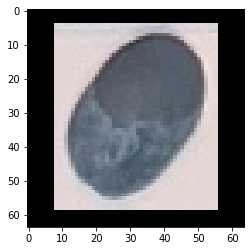

In [5]:
plt.imshow(img_list[7])

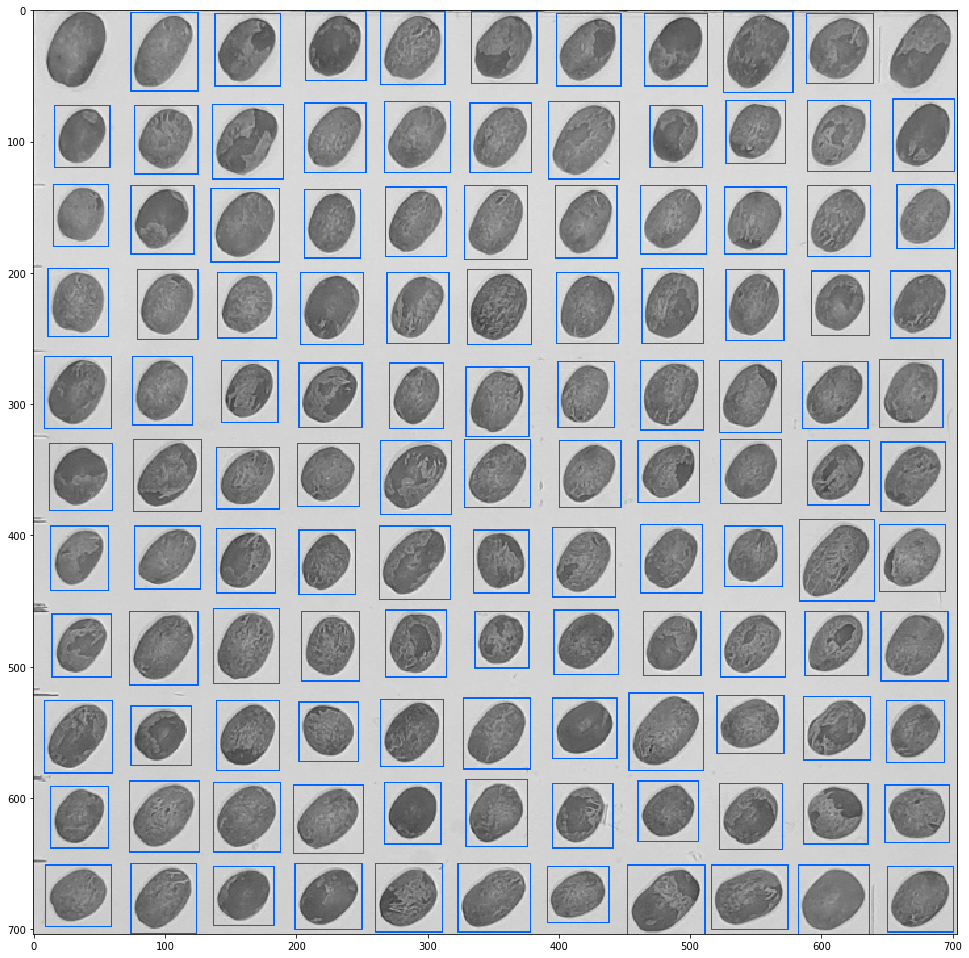

In [6]:
plt.figure(figsize = (17,17))
plt.imshow(dst)

# 코드 통합

In [7]:
# 데이터 로드
src_path = './data/normal_data/real_data_normal/20200518_take1.jpg'
img = Image.open(src_path)


def objectDetection(img):
    img_color = np.array(img)
    img = np.array(img.convert('L'))

    img_color_ROI = img_color[733:1437,710:1414]
    img_ROI = img[733:1437,710:1414]
    

    # 데이터 이진화
    _, src_bin = cv2.threshold(img_ROI, 180, 255, cv2.THRESH_BINARY)
    src_bin = cv2.bitwise_not(src_bin)

    # 데이터 처리
    img_list = list()
    nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(src_bin)
    dst = cv2.cvtColor(img_ROI, cv2.COLOR_GRAY2BGR)
    alpha = 3
    SIZE = 64
    for i in range(1,nlabels):
        stat = stats[i]
        x = stat[0] - alpha
        y = stat[1] - alpha
        width = stat[2] + 2*alpha
        height = stat[3] + 2*alpha
        n_pixel = stat[4]

        
        # 최대 픽셀 지정해서 임계값보다 크면 패스해버리기
        if n_pixel < 500 or width > 64 or height > 64 : continue
        
        cv2.rectangle(dst, (x, y), (x+width, y+height), (0,100,255))
        
        
        delta_x = int((SIZE - width) / 2)
        delta_y = int((SIZE - height) / 2)
        
        tmp1 = img_color_ROI[y : y+height, x : x+width, :].copy()
        tmp2 = np.zeros((64,64,3), dtype = int)
        
        # print(stat) # 가장자리쪽에 있는 생두들은 ROI를 벗어나는것들이 있다.
        try:
            for i in range(3):
                tmp2[delta_y : delta_y + height, delta_x : delta_x + width , i] = tmp1[0:height, 0:width, i]
                
        except:
            print('에러다임마')
        
        img_list.append(tmp2)
    return img_list

에러다임마
에러다임마
에러다임마
에러다임마


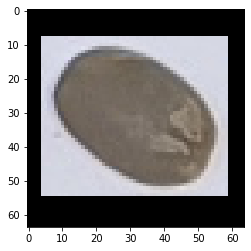

In [8]:
plt.imshow(objectDetection(img)[0]) => CNN => OUTPUT => 설비(웹페이지 ?))

4